## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## READING CSV FILE

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\CC GENERAL.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.drop('CUST_ID',axis=1,inplace=True)

## DETECTING NULL VALUES

In [6]:
df.isnull().sum()/len(df)*100

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

## DROPPING NULL VALUES

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()/len(df)*100

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

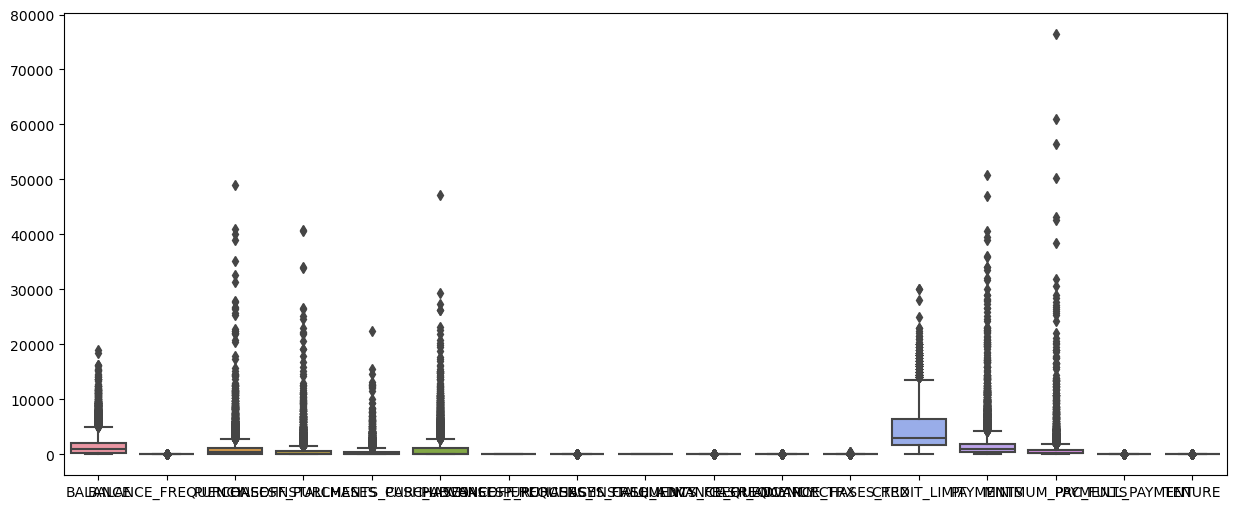

In [11]:
plt.figure(figsize=(15,6))
sns.boxplot(df)
plt.show()

In [12]:
def wisker(col):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  return lower,upper

In [13]:
for i in df.select_dtypes(include=['number']).columns:
  lower,upper=wisker(i)
  df[i]=np.where(df[i]<lower,lower,df[i])
  df[i]=np.where(df[i]>upper,upper,df[i])

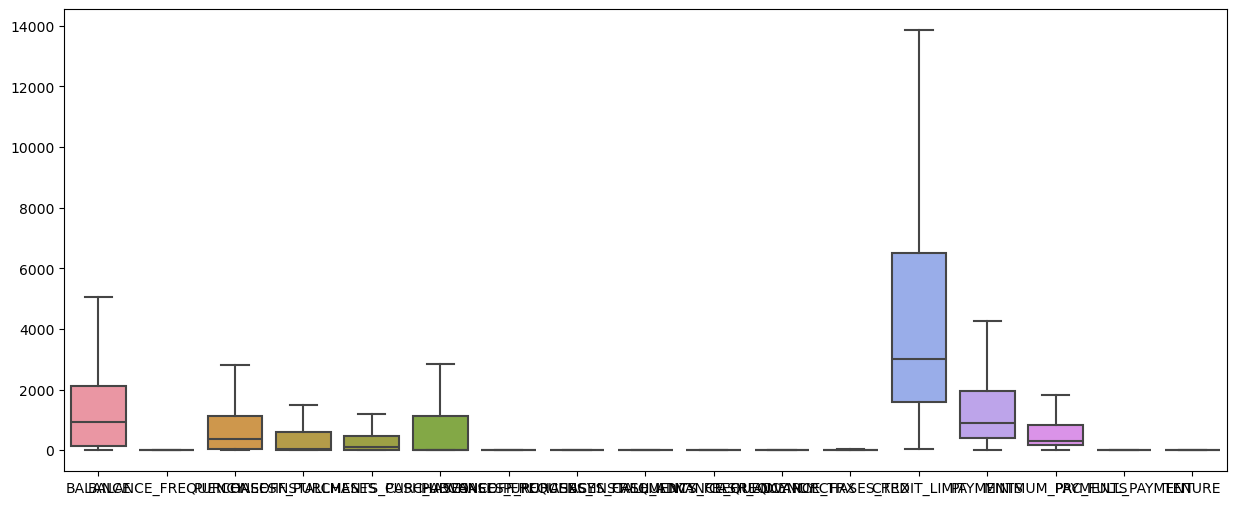

In [14]:
plt.figure(figsize=(15,6))
sns.boxplot(df)
plt.show()

## SCALING - MINMAX SCALER

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit_transform(df)

array([[-0.89104546, -1.39949007, -0.73441682, ..., -0.77761577,
        -0.62947992,  0.        ],
       [ 1.13709821, -0.39690015, -0.84008069, ...,  0.88719429,
         0.76637783,  0.        ],
       [ 0.68335366,  0.60568978,  0.01627298, ...,  0.09290979,
        -0.62947992,  0.        ],
       ...,
       [-0.90227304, -1.23239726, -0.68014501, ..., -0.87950606,
         0.94086162,  0.        ],
       [-0.90865026, -1.23239726, -0.84008069, ..., -0.9270907 ,
         0.94086162,  0.        ],
       [-0.67819121, -1.90078503,  0.37078969, ..., -0.86902891,
        -0.62947992,  0.        ]])

In [16]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40000,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00000,2830.963725,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00000,0.000000,1.000000,0.833333,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00000,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
5,1809.828751,1.000000,1333.28,0.00,1210.36875,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,1809.995839,0.000000,12.0


## CHECKING CORRELATION

In [17]:
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.383269,0.086108,0.115354,0.002530,0.558341,-0.121052,0.067151,-0.103414,0.489910,0.498372,0.051145,0.494754,0.345531,0.834711,-0.436527,NaN
BALANCE_FREQUENCY,0.383269,1.000000,0.162650,0.131571,0.144213,0.086565,0.207110,0.181748,0.175537,0.166577,0.159114,0.231280,0.102568,0.100574,0.350843,-0.222585,NaN
PURCHASES,0.086108,0.162650,1.000000,0.832296,0.707116,-0.180732,0.631784,0.678183,0.490085,-0.209698,-0.196722,0.809416,0.332327,0.503146,0.079822,0.208435,NaN
ONEOFF_PURCHASES,0.115354,0.131571,0.832296,1.000000,0.289501,-0.120796,0.412144,0.815134,0.157840,-0.129625,-0.124354,0.627739,0.322281,0.426683,0.052612,0.088785,NaN
INSTALLMENTS_PURCHASES,0.002530,0.144213,0.707116,0.289501,1.000000,-0.187278,0.684322,0.246214,0.777685,-0.220253,-0.204975,0.722148,0.195020,0.322385,0.059722,0.250058,NaN
CASH_ADVANCE,0.558341,0.086565,-0.180732,-0.120796,-0.187278,1.000000,-0.322713,-0.139735,-0.266486,0.765813,0.803293,-0.204096,0.260318,0.338967,0.437093,-0.241244,NaN
PURCHASES_FREQUENCY,-0.121052,0.207110,0.631784,0.412144,0.684322,-0.322713,1.000000,0.502198,0.862338,-0.337056,-0.323422,0.785497,0.119609,0.156295,-0.049727,0.317883,NaN
ONEOFF_PURCHASES_FREQUENCY,0.067151,0.181748,0.678183,0.815134,0.246214,-0.139735,0.502198,1.000000,0.144934,-0.125977,-0.127670,0.648627,0.295306,0.337300,0.011267,0.127493,NaN
PURCHASES_INSTALLMENTS_FREQUENCY,-0.103414,0.175537,0.490085,0.157840,0.777685,-0.266486,0.862338,0.144934,1.000000,-0.284642,-0.269616,0.694194,0.060374,0.114387,-0.021500,0.267349,NaN
CASH_ADVANCE_FREQUENCY,0.489910,0.166577,-0.209698,-0.129625,-0.220253,0.765813,-0.337056,-0.125977,-0.284642,1.000000,0.926968,-0.216783,0.132923,0.212625,0.374345,-0.279158,NaN


In [18]:
X=df[['CREDIT_LIMIT','BALANCE_FREQUENCY']].values

In [19]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

## ELBOW GRAPH

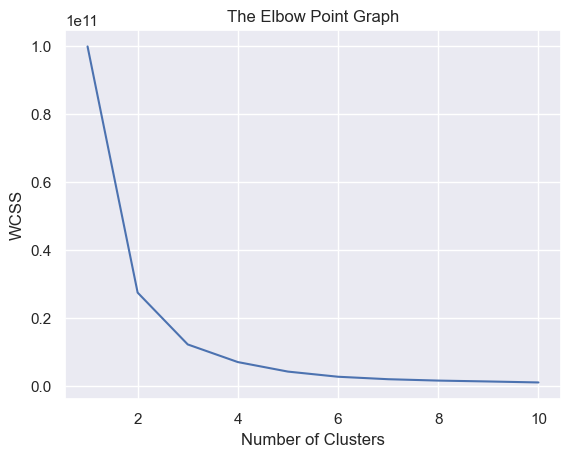

In [20]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X)

In [22]:
Y

array([0, 1, 1, ..., 0, 0, 0])

## FORMING CLUSTERS

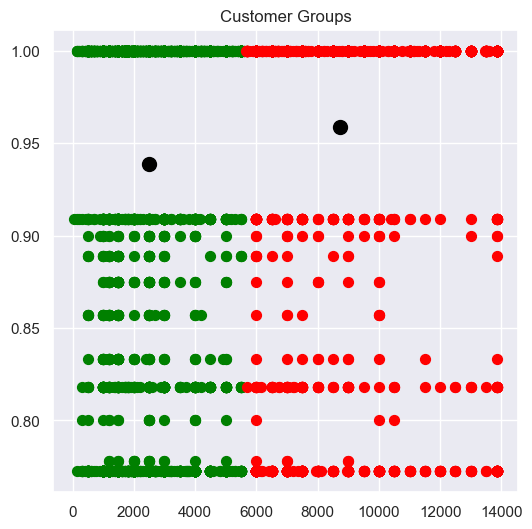

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.show()

## CHECKING SCORE

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
silhouette_score(X,Y)

0.6655901665415549

In [80]:
X1=df[['CREDIT_LIMIT','PRC_FULL_PAYMENT']].values

In [81]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X1)

    wcss.append(kmeans.inertia_)

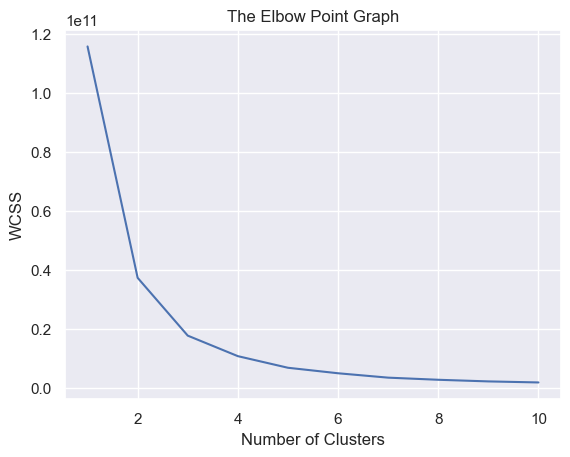

In [82]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [83]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X1)

In [84]:
Y

array([0, 1, 1, ..., 0, 0, 0])

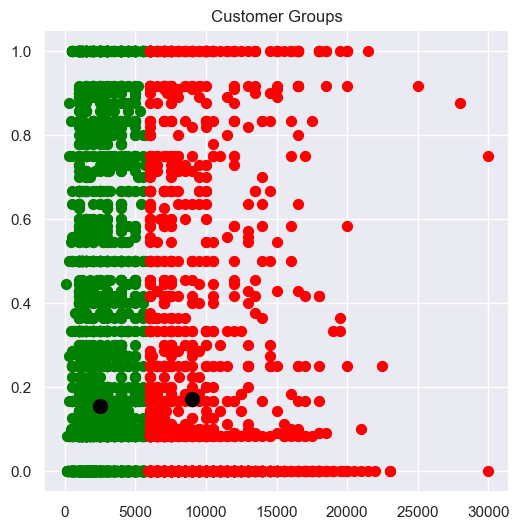

In [85]:
plt.figure(figsize=(6,6))
plt.scatter(X1[Y==0,0], X1[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X1[Y==1,0], X1[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.show()

In [86]:
silhouette_score(X1,Y)

0.6575935291460842

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca=PCA(n_components=2,random_state=42)

In [28]:
X_pca=pca.fit_transform(X)

In [29]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_pca)

    wcss.append(kmeans.inertia_)

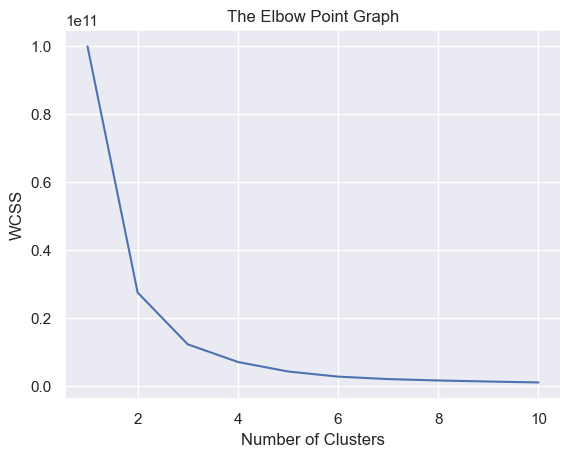

In [30]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X_pca)

In [33]:
Y

array([1, 0, 0, ..., 1, 1, 1])

In [34]:
silhouette_score(X_pca,Y)

0.6472798178452684